# Heart Attack Analysis & Prediction

A heart attack occurs when the flow of blood to the heart is blocked. The blockage is most often a buildup of fat, cholesterol and other substances, which form a plaque in the arteries that feed the heart (coronary arteries).

Sometimes, a plaque can rupture and form a clot that blocks blood flow. The interrupted blood flow can damage or destroy part of the heart muscle.

A heart attack, also called a myocardial infarction, can be fatal, but treatment has improved dramatically over the years. It's crucial to call 911 or emergency medical help if you think you might be having a heart attack.


Machine Learning can play an essential role in predicting presence/absence of Locomotor disorders, Heart diseases and more. Such information, if predicted well in advance, can provide important insights to doctors who can then adapt their diagnosis and treatment per patient basis.

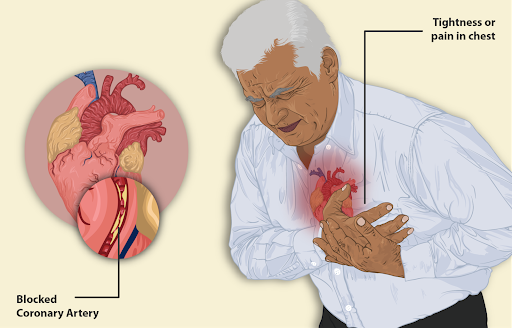

This dataset is taken from Kaggle, if you want to visit more works here is the link : https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.pyplot import rcParams

plt.style.use("ggplot")
warnings.filterwarnings("ignore")
rcParams["figure.figsize"] = 10, 8

In [2]:
feature_meanings = {"age" : "Age of the patient",
                    "sex" : "Sex of the patient",
                    "exng": "exercise induced angina (1 = yes; 0 = no)",
                    "caa": "number of major vessels (0-3)",
                    "cp" : "Chest Pain type chest pain type",
                    "trtbps" : "resting blood pressure (in mm Hg)",
                    "chol" : "cholestoral in mg/dl fetched via BMI sensor",
                    "fbs" : "(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)",
                    "restecg" : "resting electrocardiographic results",
                    "thalachh" : "maximum heart rate achieved",
                    "output" : "0= less chance of heart attack 1= more chance of heart attack"}

In [3]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis 

In [4]:
def brief_description(dataframe):
    index = list(data.columns)
    missing_no = data.isna().sum().values
    missing_pct = (missing_no / len(data)) * 100
    dtypes = list(data.dtypes.values)
    columns = ["No. Missings", "Missing Pct.", "Dtype", "Meaning"]
    description = pd.DataFrame(columns=columns, index=index)
    description["No. Missings"] = missing_no
    description["Missing Pct."] = missing_pct
    description["Dtype"] = dtypes
    description["Meaning"] = "No Description"
    for i in feature_meanings:
        description.loc[i, "Meaning"] = feature_meanings[i]
        
    return description

brief_description(data)

,No. Missings,Missing Pct.,Dtype,Meaning
age,0,0.0,int64,Age of the patient
sex,0,0.0,int64,Sex of the patient
cp,0,0.0,int64,Chest Pain type chest pain type
trtbps,0,0.0,int64,resting blood pressure (in mm Hg)
chol,0,0.0,int64,cholestoral in mg/dl fetched via BMI sensor
fbs,0,0.0,int64,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
restecg,0,0.0,int64,resting electrocardiographic results
thalachh,0,0.0,int64,maximum heart rate achieved
exng,0,0.0,int64,exercise induced angina (1 = yes; 0 = no)
oldpeak,0,0.0,float64,No Description


In [5]:
data["output"].value_counts() # It seems like our target is balanced

1    165
0    138
Name: output, dtype: int64

In [6]:
data.corr().loc["output"].abs().sort_values(ascending=False)[1:]

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

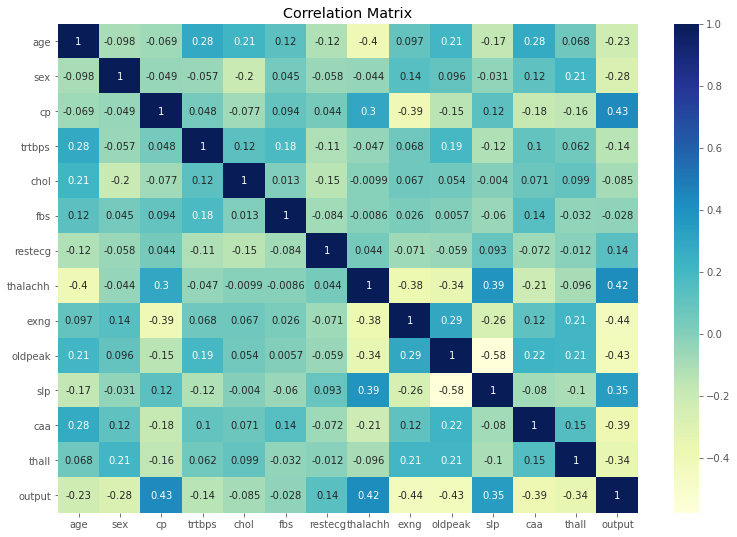

In [7]:
plt.figure(figsize=(13,9))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix");

### Distributions of Continuous Values for Their Classes

In [8]:
def show_distribution(col_name, bins=15):
    
    plt.figure(figsize=(24, 8))
    plt.subplot(1,3,1)
    ax1 = sns.histplot(data.loc[data["output"] == 0, col_name], bins=bins, color="g")
    ax1.set_title(f"{col_name} Column Class 0 Distribution")
    plt.subplot(1,3,2)
    ax2 = sns.histplot(data[col_name], bins=bins, color="b")
    ax2.set_title(f"{col_name} Column Distribution")
    plt.subplot(1,3,3)
    ax3 = sns.histplot(data.loc[data["output"] == 1, col_name], bins=bins, color="r")
    ax3.set_title(f"{col_name} Column Class 1 Distribution");

#### age Column 

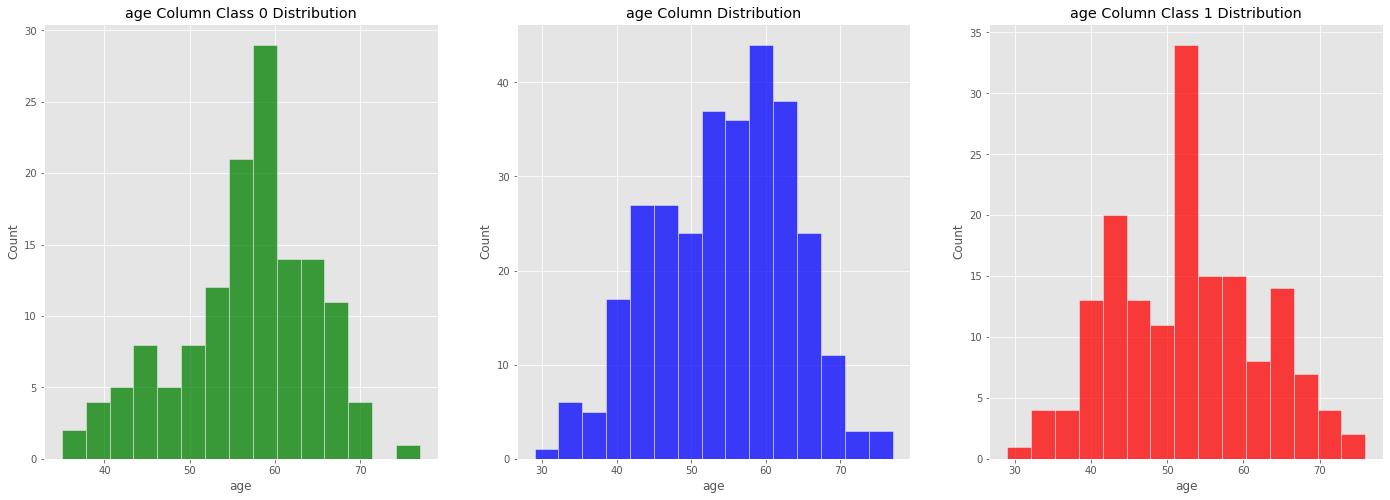

In [9]:
show_distribution("age")

#### trtbps Column 

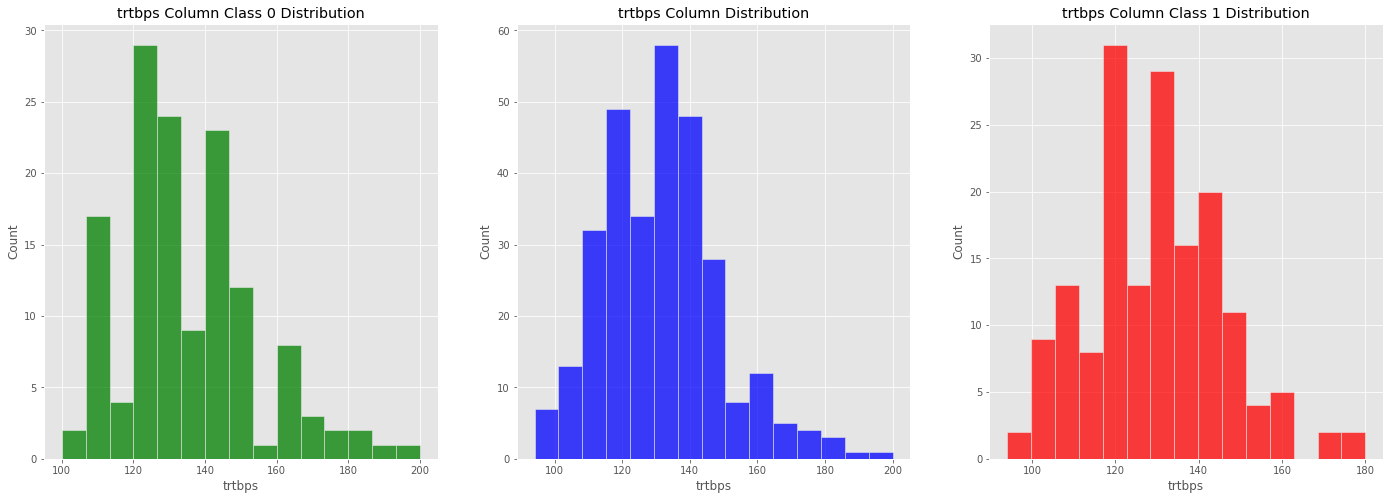

In [10]:
show_distribution("trtbps")

#### chol Column 

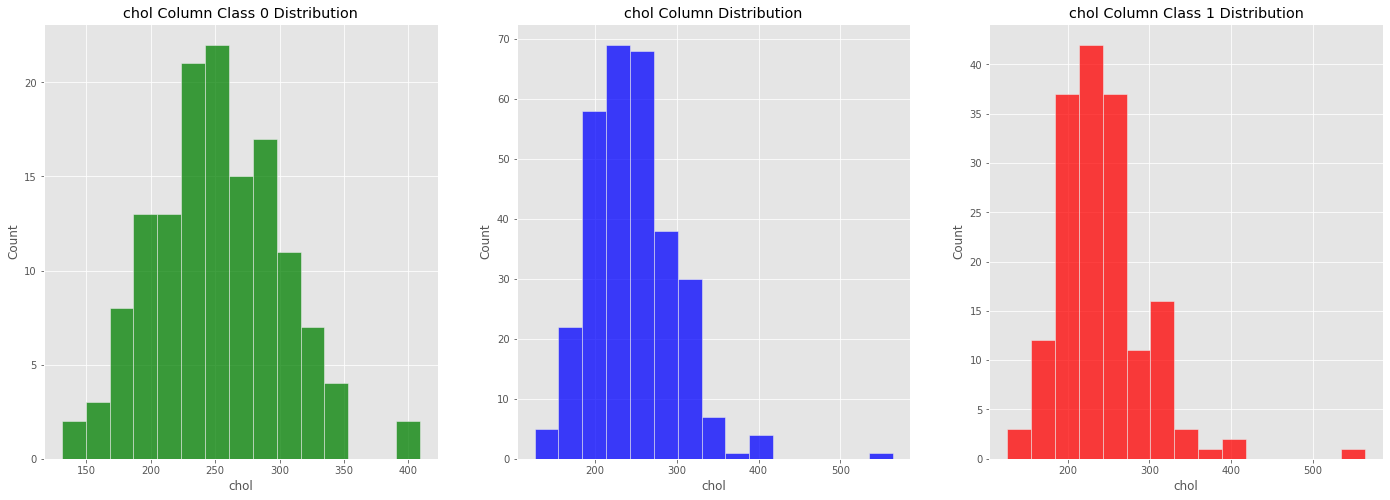

In [11]:
show_distribution("chol")

#### thalachh Column 

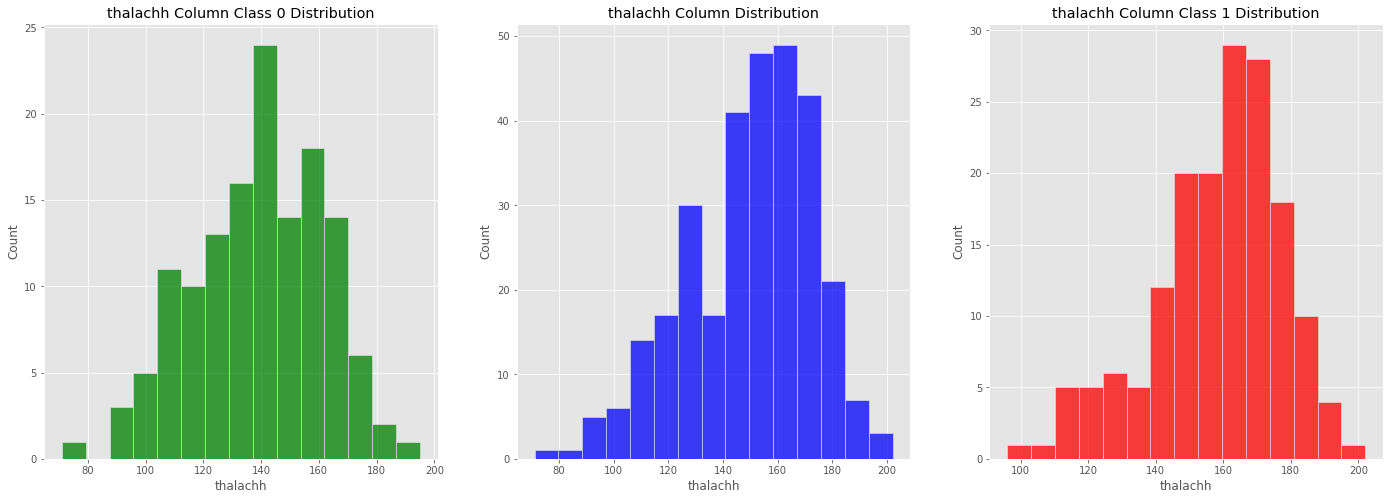

In [12]:
show_distribution("thalachh")

#### oldpeak Colum 

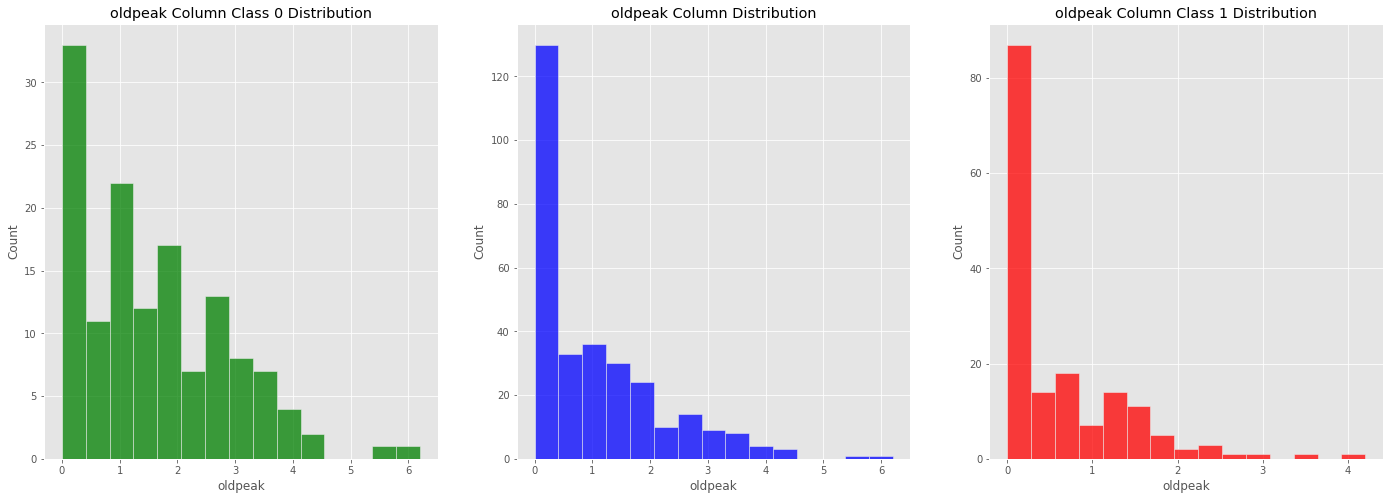

In [13]:
show_distribution("oldpeak")

### Counts of Categorical Values for Each Classes 

In [14]:
def show_counts(col_name):
    
    plt.figure(figsize=(24, 8))
    plt.subplot(1,3,1)
    ax1 = sns.countplot(data.loc[data["output"] == 0, col_name], color="g", order=data.loc[data["output"] == 0, col_name].value_counts().index)
    ax1.set_title(f"{col_name} Column Class 0 Counts")
    plt.subplot(1,3,2)
    ax2 = sns.countplot(data[col_name], color="b", order=data[col_name].value_counts().index)
    ax2.set_title(f"{col_name} Column Distribution")
    plt.subplot(1,3,3)
    ax3 = sns.countplot(data.loc[data["output"] == 1, col_name], color="r", order=data.loc[data["output"] == 1, col_name].value_counts().index)
    ax3.set_title(f"{col_name} Column Class 1 Counts");

In [15]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### sex Column 

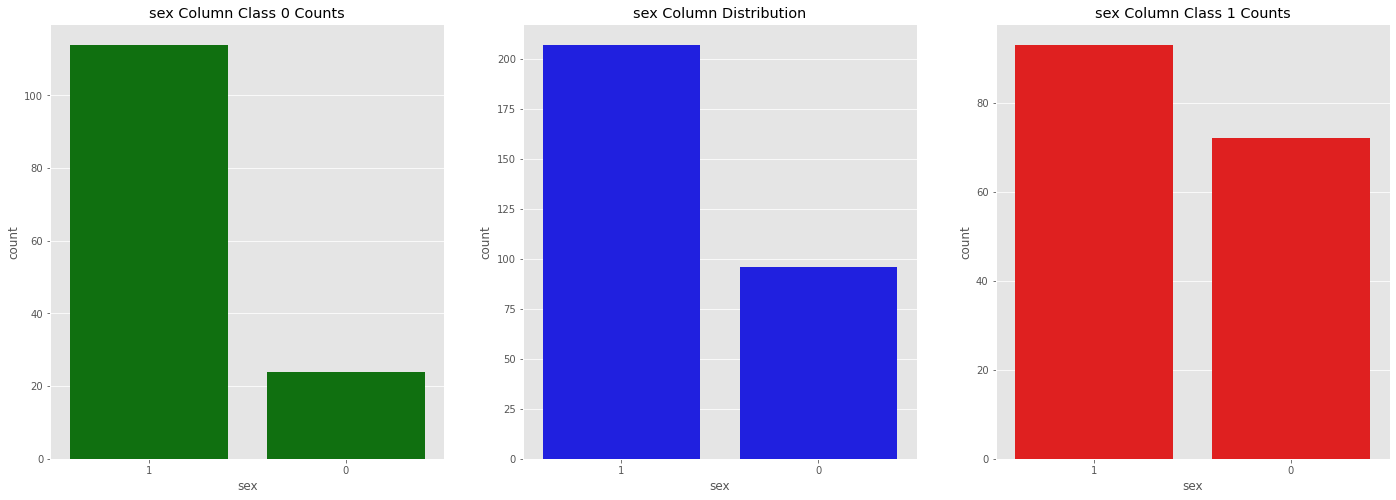

In [16]:
show_counts("sex")

#### cp Column 

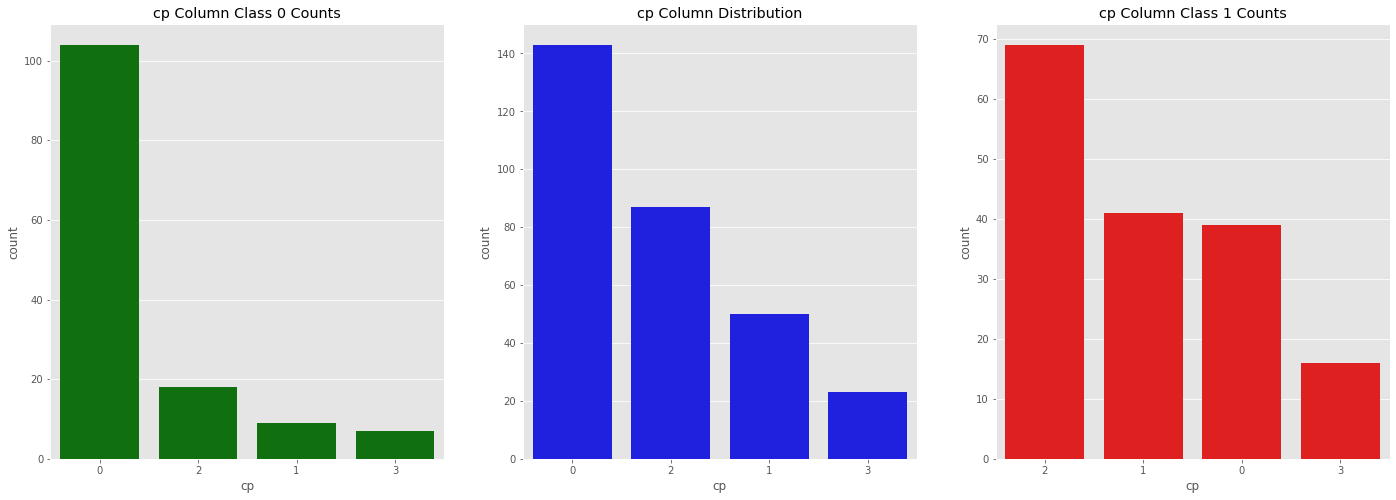

In [17]:
show_counts("cp")

#### fbs Column 

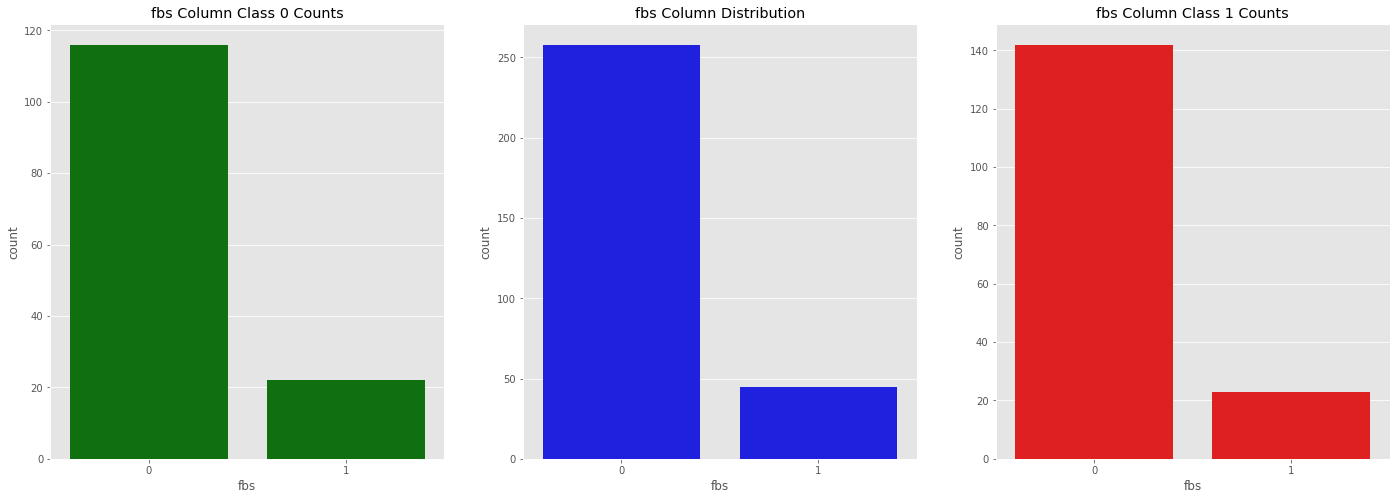

In [18]:
show_counts("fbs")

#### restecg Column 

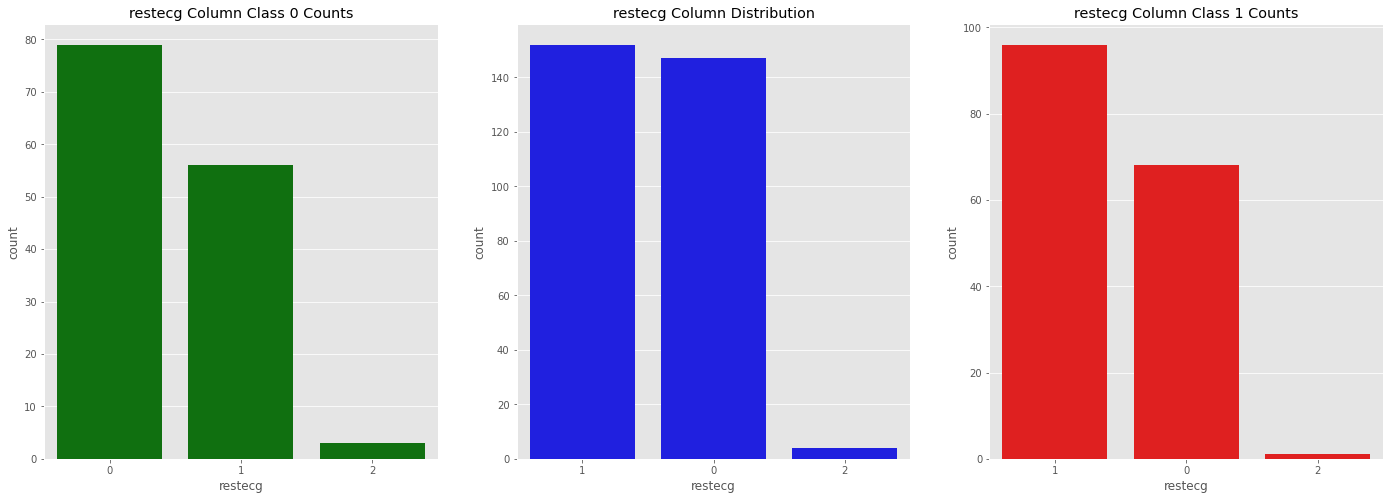

In [19]:
show_counts("restecg")

#### exng Column 

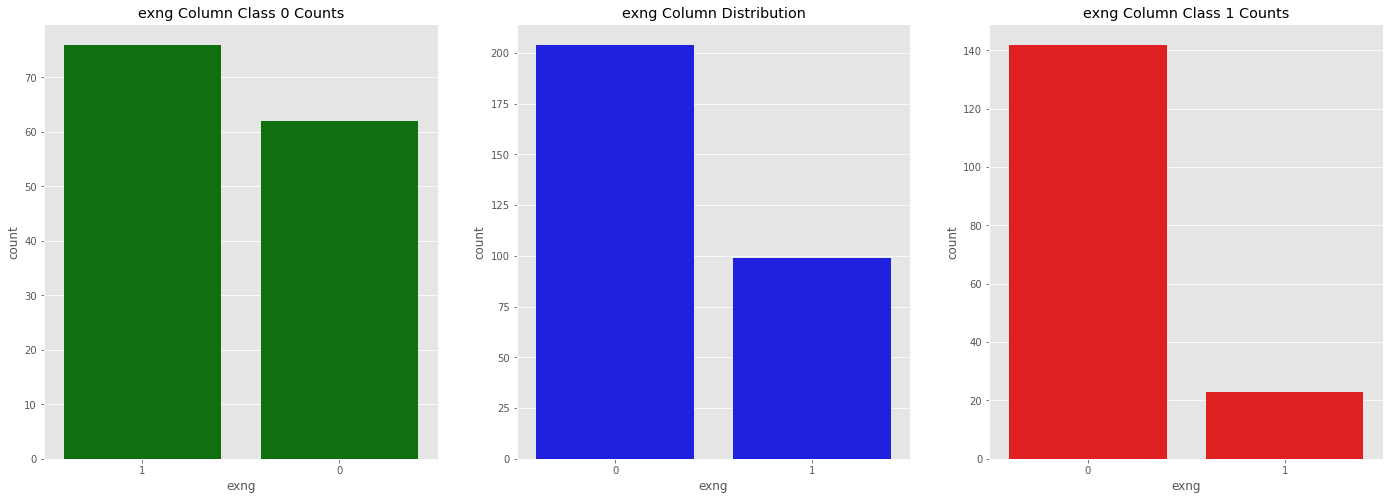

In [20]:
show_counts("exng")

#### slp Column 

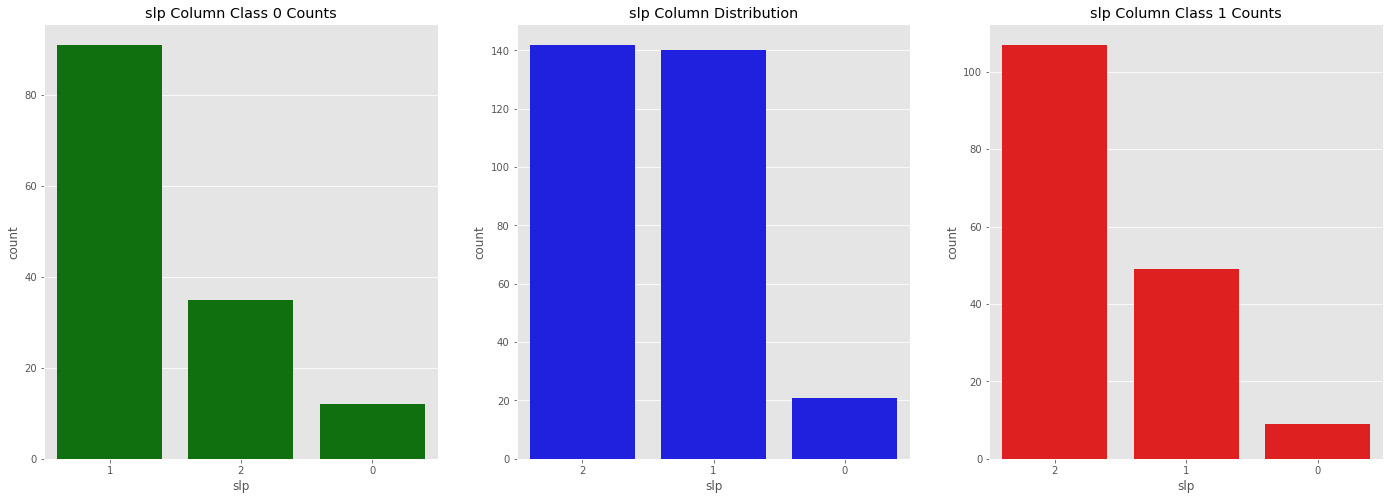

In [21]:
show_counts("slp")

#### caa Column

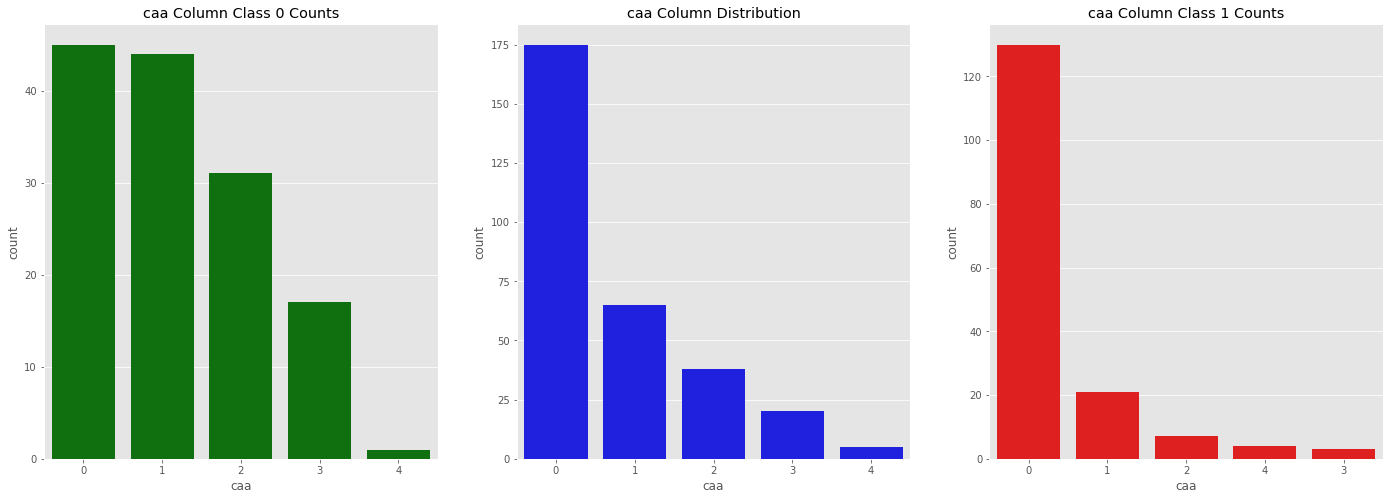

In [22]:
show_counts("caa")

#### thall Column 

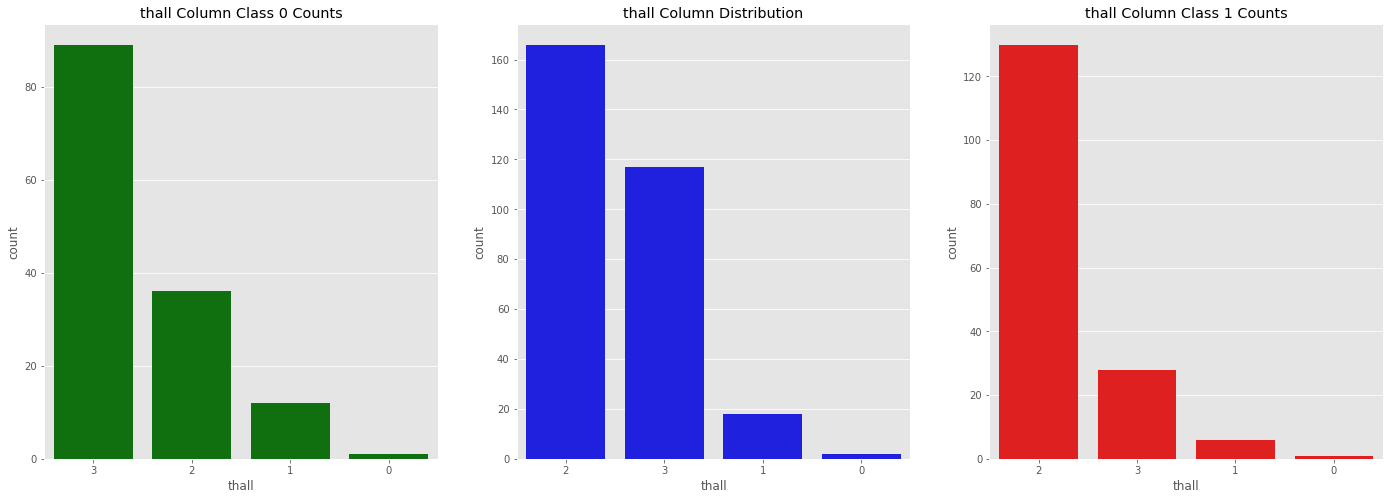

In [23]:
show_counts("thall")

## Random Forest Classifier Model 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
X = data.drop("output", axis=1).values
y = data["output"].values

# 80% Train, 20% Test Set
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
random_forest_clf = RandomForestClassifier()
params = {
        'bootstrap': [True], # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
        'max_depth': [80, 90, 100, 110], # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        'max_features': ["auto", ], # The number of features to consider when looking for the best split.
        'min_samples_leaf': [3, 4, 5], # The minimum number of samples required to be at a leaf node.
        'min_samples_split': [8, 10, 12], # The minimum number of samples required to split an internal node.
        'n_estimators': [100, 200, 300, 1000], # The number of trees in the forest.
        }

grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=params,
                           cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True)

In [26]:
print(f"Mean Train Score : {np.round(grid_search.cv_results_['mean_train_score'].mean(),2)}")
print(f"Mean Validation Score : {np.round(grid_search.cv_results_['mean_test_score'].mean(), 2)}")

Mean Train Score : 0.92
Mean Validation Score : 0.83


In [27]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [28]:
model = RandomForestClassifier(n_estimators=300, 
                               min_samples_split=10, 
                               min_samples_leaf=4, 
                               max_depth=80,
                               random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=0)

In [29]:
preds = model.predict(X_test)
print(f"Accuracy for Unseen Test Data : {np.round(accuracy_score(y_test, preds), 2)}")

Accuracy for Unseen Test Data : 0.89


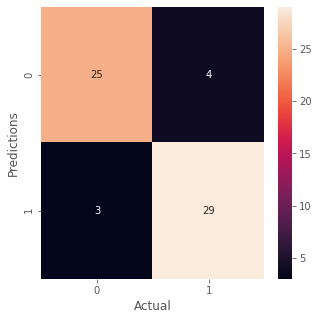

In [30]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, preds), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predictions");

In [31]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



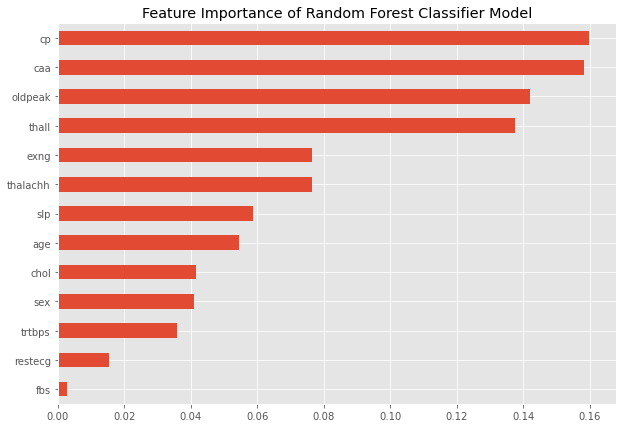

In [32]:
plt.figure(figsize=(10,7))
features = list(data.columns)[:-1]
importances = list(model.feature_importances_)
feature_importance = pd.Series(importances, index=features)
feature_importance.sort_values(ascending=True).plot(kind="barh")
plt.title("Feature Importance of Random Forest Classifier Model");